In [5]:
#Importando as bibliotecas que serão utilizadas
import pandas as pd
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#1. Conhecendo os dados
***

##1.1 Dataset do projeto

### Contratos do MCMV-Financiado com FGTS (dados analíticos) ###

Esta página fornece download dos conjuntos de dados sobre a situação dos empreendimentos e das unidades habitacionais contratadas pelo **Programa Minha Casa, Minha Vida (MCMV)**, com subsídios custeados do Orçamento Geral da União (OGU). Também apresenta as unidades habitacionais financiadas com recursos do FGTS, nas faixas de renda estabelecidas pelo MCMV. E ainda a situação de regularidade dos entes federados no Sistema Nacional de Habitação de Interesse Social (SNHIS), a qual é necessária para participação em algumas modalidades do MCMV.

Os dados fornecidos atendem ao Plano de Dados Abertos do Ministério das Cidades. Os dados disponíveis para download são especialmente úteis para estudo de professores, pesquisadores, alunos, universitários, pós-graduandos e demais interessados na habitação de interesse social. Por isso, também estão disponíveis para download os respectivos dicionários de dados dos conjuntos.

Além das bases de dados abaixo, relativas ao MCMV, também existem dados do PBQP-H - Programa Brasileiro da Qualidade e Produtividade do Habitat, ação governamental da Secretaria Nacional de Habitação que possui importante intersetorialidade com o Programa Minha Casa, Minha Vida.

A periodicidade de publicação dos conjuntos de dados abaixo é, no mínimo, trimestral, acompanhando o previsto no Plano de Dados Abertos do Ministério das Cidades, a partir do dia 20 de março.

### Fontes ###

Fonte: https://www.gov.br/cidades/pt-br/acesso-a-informacao/acoes-e-programas/habitacao/programa-minha-casa-minha-vida/bases-de-dados-do-programa-minha-casa-minha-vida

Fonte dos dados:
https://www.cidades.gov.br/images/stories/ArquivosSNH/ArquivosZIP/dados_abertos_FGTS_ANALITICO_202505.rar

### Dicionário de dados ###
O leiaute do arquivo CSV utilizado segue o leiaute que consta na página 4 do documento abaixo.

https://www.gov.br/cidades/pt-br/acesso-a-informacao/acoes-e-programas/habitacao/programa-minha-casa-minha-vida/arquivos/Dicionarios_SNH_2025_04_14.pdf



### Variáveis utilizadas

- Valor do Financiamento (vlr_financiamento):
    Valor total das operações de crédito realizadas entre o agente financeiro e os mutuários.

- Valor de Compra (vlr_compra): Descreve o valor pedido pelo vendedor, normalmente o mesmo que o valor de garantia.

- Valor da Renda Familiar (vlr_renda_familiar):
    Representa o valor de renda familiar do mutuário/contratante, utilizada para a contratação do financiamento


### Determinando o tamanho da amostra ###

O dataset original fornecido pelo governo tem por 1.1 Gb e por volta 6 milhões de linhas, o que torna o processamento lento. Como nosso intuito é didático, usaremos uma amostragem estatisticamente relevante.
Assim, precisamos saber quantas linhas são necessárias para que ela seja "estatisticamente relevante".

Temos os seguintes dados:

Tamanho da População (N): 6.000.000]

Nível de Confiança: Escolhemos 95%. É a probabilidade de a amostra refletir a população real.

Margem de Erro: Escolheremos 1%. É o quanto os resultados da sua amostra podem desviar dos resultados reais da população.

Para uma população de 6 milhões de observações, o tamanho da amostra se estabiliza. Usando uma calculadora de tamanho de amostra, para 95% de confiança e 1% de erro, precisaremos de uma amostra minima de 9589 registros.

#### Geração da Amostra
Os seguintes tratamentos foram realizados sobre os dados para uma geração da amostra
1. Foi definido uma amostra de 100.000 registros
2. Foi definido um random state para tentar usar o mesmo comportamento na geração de eventuais outras amostras

In [6]:
''' Código utilizado para geração da amostra
dados = pd.read_csv("dados_abertos_FGTS_ANALITICO_202505.csv")
sample_df = dados.sample(n=100000, random_state=5)
sample_df.to_csv("AMOSTRA_100K_dados_abertos_FGTS_ANALITICO_202505.csv")
'''

' Código utilizado para geração da amostra\ndados = pd.read_csv("dados_abertos_FGTS_ANALITICO_202505.csv")\nsample_df = dados.sample(n=100000, random_state=5)\nsample_df.to_csv("AMOSTRA_100K_dados_abertos_FGTS_ANALITICO_202505.csv")\n'

### Importando pandas e conhecendo o dataset do projeto

In [7]:
dados_raw = pd.read_csv("AMOSTRA_100K_dados_abertos_FGTS_ANALITICO_202505.csv", sep=';') #95% nível de confiança / 1% de margem erro
dados_raw.head(5)

,",,,,,,,,data_referencia",cod_ibge,txt_municipio,mcmv_fgts_txt_uf,txt_regiao,data_assinatura_financiamento,qtd_uh_financiadas,vlr_financiamento,vlr_subsidio_desconto_fgts,vlr_subsidio_desconto_ogu,...,vlr_compra,vlr_renda_familiar,txt_programa_fgts,num_taxa_juros,txt_tipo_imovel,bln_cotista,txt_sistema_amortizacao,dte_nascimento,txt_compatibilidade_faixa_renda,txt_nome_empreendimento
0,02/05/2025,312770,Governador Valadares,MG,Sudeste,2012-01-18,1,"73334,78","7971,974999999999","4006,8070000000007",...,"92000,0","1954,67",Apoio à Produção,"5,0",Novo,N,price,NaN,Faixa 2,NaN
1,02/05/2025,350950,Campinas,SP,Sudeste,2025-04-08,1,"163893,65","2328,0","0,0",...,"264000,0","3039,62",Apoio à Produção,NaN,Novo,NaN,NaN,NaN,Faixa 2,","
2,02/05/2025,312980,Ibirité,MG,Sudeste,2018-03-08,1,"126400,0","3556,8","395,2",...,"158000,0","2711,88",Apoio à Produção,"5,5",Novo,S,price,1988-09-06,Faixa 2,NaN
3,02/05/2025,355030,São Paulo,SP,Sudeste,2019-06-12,1,"156951,41","1162,8","129,2",...,"229792,33","3421,53",Apoio à Produção,"6,5",Novo,S,price,1985-07-26,Faixa 2,NaN
4,02/05/2025,510525,Lucas do Rio Verde,MT,Centro-Oeste,2015-04-14,1,"63567,57000000001","11331,375","2403,625",...,"84300,0","1500,93",Apoio à Produção,"5,0",Novo,N,price,NaN,Faixa 1,NaN


In [8]:
#Identificar a quantidade de dados nulos (Nan) de cada coluna do DataSet
dados_raw.isnull().sum()

,0
",,,,,,,,data_referencia",0
cod_ibge,0
txt_municipio,0
mcmv_fgts_txt_uf,0
txt_regiao,0
data_assinatura_financiamento,8749
qtd_uh_financiadas,0
vlr_financiamento,0
vlr_subsidio_desconto_fgts,0
vlr_subsidio_desconto_ogu,0


In [9]:
dados_raw.shape #100.000 observações / 22 colunas

(100000, 22)

In [10]:
dados_raw['txt_regiao'].value_counts(normalize = True) * 100

,proportion
txt_regiao,
Sudeste,46.127
Nordeste,20.149
Sul,19.786
Centro-Oeste,11.277
Norte,2.661


In [11]:
dados_raw['txt_programa_fgts'].value_counts(normalize = True) * 100

,proportion
txt_programa_fgts,
Carta de Crédito Individual,54.014
Apoio à Produção,40.175
Pró-Cotista,3.357
Carta de Crédito Associativo,2.404
Faixa Estendida,0.050


In [12]:
dados_raw['txt_tipo_imovel'].value_counts(normalize = True) * 100

,proportion
txt_tipo_imovel,
Novo,81.814
Usado,18.186


In [13]:
dados_raw['txt_sistema_amortizacao'].value_counts(normalize = True) * 100

,proportion
txt_sistema_amortizacao,
price,90.318974
sac,9.668969
sacre,0.012057


In [14]:
dados_raw['txt_compatibilidade_faixa_renda'].value_counts(normalize = True) * 100

,proportion
txt_compatibilidade_faixa_renda,
Faixa 2,54.935
Faixa 1,24.683
Faixa 3,17.296
Fora MCMV/CVA,3.086


In [15]:
dados_raw['bln_cotista'].value_counts(normalize = True) * 100

,proportion
bln_cotista,
N,51.910596
S,42.857886
X,5.231518


## 1.2 - Iniciando limpeza e ajuste dos dados ##

### Tratamentos realizados após geração da amostra
Os seguintes tratamentos foram realizados sobre os dados amostrais:
 1. A primeira coluna foi eliminada pois a informação de data de referencia é igual em todas as linhas informando de quando é a informação recuperada.
 2. Foram eliminados os registros duplicados;
 3. Removido da amostra registros que são relativos a financiamentos fora do programa Minha Casa Minha Vida.
 5. Os tipos das colunas foram convertidos de acordo com o seu prefixo.
 6. Foram eliminados os registros onde os valores utilizados nos gráficos e analises exploratórias eram inválidos (nulos ou não positivos);
 7. Criar colunas idade e faixa etarea a partir da informação da data de nascimento, tratando para os cenários onde a data de nascimento não foi informada
 8. Criar coluna derivada do valor de renda familiar que categoriza de acordo com a quantidade de salarios minimos

In [16]:
#Passo 0: Criar um novo dataframe para trabalhar sobre ele mantendo a amostra original para controle
dados_limpos = pd.DataFrame(dados_raw)
dados_raw.isnull().sum()

#Passo 1 - Removendo a primeira coluna de data de referencia que possui valor igual em todas as linhas
dados_limpos = dados_limpos.iloc[:, 1:]

# Passo 2 - Tratamento de linhas duplicadas
duplicadas = dados_limpos.duplicated().sum()
if duplicadas > 0:
    print(f"Encontradas {duplicadas} linhas duplicadas. Removendo-as...")
    dados_limpos.drop_duplicates(inplace=True)
    print(f"Shape após remover duplicatas: {dados_limpos.shape}")
else:
    print("Nenhuma linha duplicada encontrada.")

# Passo 3 - Remover registros onde txt_compatibilidade_faixa_renda são Fora MCMV/CVA para analisar apenas os financiamentos que utilizam MCMV
dados_limpos = dados_limpos[dados_limpos['txt_compatibilidade_faixa_renda'] != 'Fora MCMV/CVA']
print(f"Shape após remover linhas cuja faixa esteja Fora MCMV/CVA': {dados_limpos.shape}")

Encontradas 185 linhas duplicadas. Removendo-as...
Shape após remover duplicatas: (99815, 21)
Shape após remover linhas cuja faixa esteja Fora MCMV/CVA': (96729, 21)


### Converte as colunas para o seu tipo mais adequado de acordo com seu prefixo

In [17]:
# Passo 4 Converter colunas
#4.1 - Conversão de colunas numericas

#Função para limpar e converter a string monetária para float no padrão brasileiro
def converter_para_float(valor):
    if isinstance(valor, str):
        # Remove o "R$", espaços em branco extras
        valor_limpo = valor.replace('R$', '').strip()
        # O ponto é separador de milhar e a vírgula é decimal.
        # Precisamos converter para o padrão que o float() entende (ponto como decimal).
        valor_limpo = valor_limpo.replace('.', '').replace(',', '.')
        try:
            return float(valor_limpo)
        except ValueError:
            return None # Ou algum outro valor para indicar erro de conversão
    return valor # Se já for numérico ou None

colunas_de_valores = ['vlr_financiamento', 'vlr_subsidio_desconto_fgts', 'vlr_subsidio_equilíbrio_fgts', 'vlr_subsidio_equilíbrio_ogu', 'vlr_subsidio_desconto_ogu', 'vlr_compra', 'vlr_renda_familiar', 'num_taxa_juros']
for coluna in colunas_de_valores:
    dados_limpos[coluna] = dados_limpos[coluna].apply(converter_para_float)
    print(f"Coluna '{coluna}' convertida para númerica.")

Coluna 'vlr_financiamento' convertida para númerica.
Coluna 'vlr_subsidio_desconto_fgts' convertida para númerica.
Coluna 'vlr_subsidio_equilíbrio_fgts' convertida para númerica.
Coluna 'vlr_subsidio_equilíbrio_ogu' convertida para númerica.
Coluna 'vlr_subsidio_desconto_ogu' convertida para númerica.
Coluna 'vlr_compra' convertida para númerica.
Coluna 'vlr_renda_familiar' convertida para númerica.
Coluna 'num_taxa_juros' convertida para númerica.


In [18]:
#4.2 Convertendo os campos para seu tipo adequado de acordo com o prefixo de cada um
for col in dados_limpos.columns:
  print(f"Processando coluna: {col} (Tipo original: {dados_limpos[col].dtype})")
  if col.startswith('data_') or col.startswith('dte_'):
      dados_limpos[col] = pd.to_datetime(dados_limpos[col], errors='coerce')
      print(f"  -> Convertida para datetime.")
  elif col.startswith('qtd_'):
      dados_limpos[col] = pd.to_numeric(dados_limpos[col], errors='coerce')
      print(f"  -> Convertida para numérico (quantidade).")
  elif col.startswith('cod_'):
      if not pd.api.types.is_numeric_dtype(dados_limpos[col]):
          dados_limpos[col] = pd.to_numeric(dados_limpos[col], errors='coerce')
      print(f"  -> Processada como código (tentativa de conversão numérica).")

Processando coluna: cod_ibge (Tipo original: int64)
  -> Processada como código (tentativa de conversão numérica).
Processando coluna: txt_municipio (Tipo original: object)
Processando coluna: mcmv_fgts_txt_uf (Tipo original: object)
Processando coluna: txt_regiao (Tipo original: object)
Processando coluna: data_assinatura_financiamento (Tipo original: object)
  -> Convertida para datetime.
Processando coluna: qtd_uh_financiadas (Tipo original: int64)
  -> Convertida para numérico (quantidade).
Processando coluna: vlr_financiamento (Tipo original: float64)
Processando coluna: vlr_subsidio_desconto_fgts (Tipo original: float64)
Processando coluna: vlr_subsidio_desconto_ogu (Tipo original: float64)
Processando coluna: vlr_subsidio_equilíbrio_fgts (Tipo original: float64)
Processando coluna: vlr_subsidio_equilíbrio_ogu (Tipo original: float64)
Processando coluna: vlr_compra (Tipo original: float64)
Processando coluna: vlr_renda_familiar (Tipo original: float64)
Processando coluna: txt_pro

In [19]:
# Passo 5 Tratar campos nulos e positivos
#Passo 5.1 - Tratamento de campos nulos
#5.1.1 - Definindo colunas que não podem possuir valores nulos (Nan)
colunas_de_valores_que_nao_podem_ter_valores_NaN = [
    'vlr_financiamento',
    'vlr_compra',
    'vlr_renda_familiar',
    'num_taxa_juros'
]

#5.1.2 - Remover linhas com algum valor NaN nas variáveis verificadas.
for coluna in colunas_de_valores_que_nao_podem_ter_valores_NaN:
  dados_limpos = dados_limpos.dropna(subset=[coluna])
  print(f"Shape após remover linhas com NaN em '{coluna}': {dados_limpos.shape}")

#5.2.1 - Definindo colunas que precisam ter valores maiores que zero
colunas_de_valores_que_nao_podem_ter_valores_zero = [
    'vlr_financiamento',
    'vlr_compra',
    'vlr_renda_familiar',
    'num_taxa_juros'
]

#5.2.2 - Remover linhas com algum valor NaN nas variáveis verificadas.
for coluna in colunas_de_valores_que_nao_podem_ter_valores_zero:
  qtd = dados_limpos.query(f'{coluna} <= 0').shape[0]
  print(f'{coluna} : {qtd}')
print(f"Shape após remover linhas que estavam com valores menores ou iguais a zero indevidamente': {dados_limpos.shape}")

Shape após remover linhas com NaN em 'vlr_financiamento': (96729, 21)
Shape após remover linhas com NaN em 'vlr_compra': (96729, 21)
Shape após remover linhas com NaN em 'vlr_renda_familiar': (96729, 21)
Shape após remover linhas com NaN em 'num_taxa_juros': (92949, 21)
vlr_financiamento : 0
vlr_compra : 0
vlr_renda_familiar : 0
num_taxa_juros : 15
Shape após remover linhas que estavam com valores menores ou iguais a zero indevidamente': (92949, 21)


In [20]:
# Passo 7 - Gerar colunas de idade e faixa etarea
#Função para calcular idade e atribuir 0 quando não tiver data de nascimento
def calcular_idade(data_nascimento):
    if pd.isnull(data_nascimento):
        return 0;
    today = datetime.today()
    return today.year - data_nascimento.year - ((today.month, today.day) < (data_nascimento.month, data_nascimento.day))

#Função para categorizar a faixa etarea de acordo com a idade
def categorizar_idade(idade):
    if idade == 0:
        return 'Sem Data de nascimento cadastrada'
    elif idade >= 15 and idade <= 30:
        return 'Jovens (15-30 anos)'
    elif idade >= 31 and idade <= 45:
        return 'Adultos plenos (31-45 anos)'
    elif idade >= 46 and idade <= 60:
        return 'Adultos seniores (45 anos ou mais)'
    elif idade >= 61:
        return 'Idosos (Acima de 60 anos)'
    else: # Para idades menores que 15 ou outros casos
        return 'Outros'

# Aplicar as funções para criar as colunas 'idade' e 'faixa_etaria'
dados_limpos['idade'] = dados_limpos['dte_nascimento'].apply(calcular_idade)
dados_limpos['faixa_etaria'] = dados_limpos['idade'].apply(categorizar_idade)
dados_limpos['faixa_etaria'].value_counts(normalize = True) * 100

,proportion
faixa_etaria,
Sem Data de nascimento cadastrada,41.593777
Adultos plenos (31-45 anos),31.628097
Jovens (15-30 anos),15.474077
Adultos seniores (45 anos ou mais),9.066262
Idosos (Acima de 60 anos),2.237786


In [21]:
# Passo 8 - Gerar colunas de faixa de renda familiar
# Criar coluna em dados limpos para classificar a renda familiar pela quantidade de salarios minimos

def classificar_renda(renda):
    salario_minimo = 1518
    if renda < salario_minimo:
        return 'Menos que um salário minimo'
    elif renda >= salario_minimo and renda < 2 * salario_minimo:
        return 'Entre 1 e 2 salários minimos'
    elif renda >= 2 * salario_minimo and renda < 3 * salario_minimo:
        return 'Entre 2 e 3 salários minimos'
    elif renda >= 3 * salario_minimo and renda < 4 * salario_minimo:
        return 'Entre 3 e 4 salários minimos'
    elif renda >= 4 * salario_minimo:
        return 'Maior que 4 salários minimos'
    else:
        return None # Para valores nulos ou inválidos

dados_limpos['faixa_renda_familiar'] = dados_limpos['vlr_renda_familiar'].apply(classificar_renda)

print("\nDistribuição por faixa de renda familiar:")
print(dados_limpos['faixa_renda_familiar'].value_counts(dropna=False))


Distribuição por faixa de renda familiar:
faixa_renda_familiar
Entre 1 e 2 salários minimos    56782
Entre 2 e 3 salários minimos    16340
Menos que um salário minimo      9303
Entre 3 e 4 salários minimos     6994
Maior que 4 salários minimos     3530
Name: count, dtype: int64


# 2 Realizando análise exploratória dos dados amostra #

## 2.1 Gerando histogramas dos valores de financiamento, compra do imóvel e renda familiar

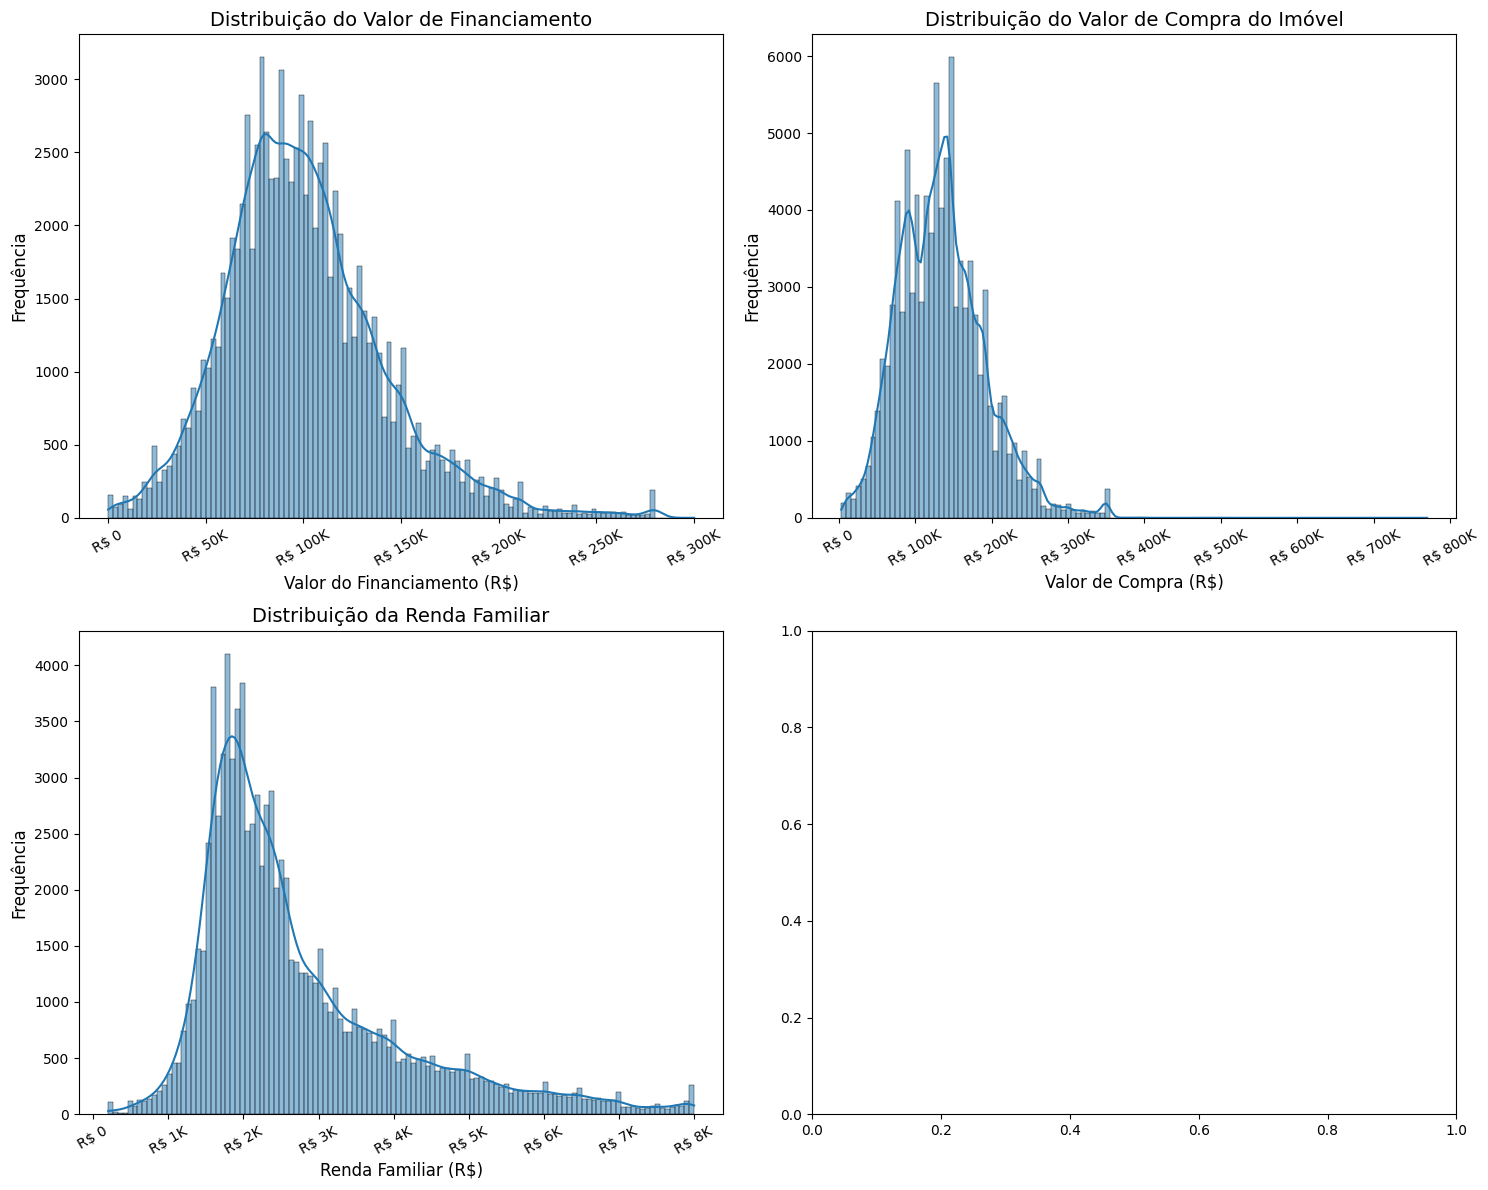

In [22]:
# Colunas para os histogramas
colunas_histograma = ['vlr_financiamento', 'vlr_compra', 'vlr_renda_familiar']
titulos = [
    'Distribuição do Valor de Financiamento',
    'Distribuição do Valor de Compra do Imóvel',
    'Distribuição da Renda Familiar'
]
x_labels = [
    'Valor do Financiamento (R$)',
    'Valor de Compra (R$)',
    'Renda Familiar (R$)'
]

# Formatação para eixos monetários e percentuais
def format_currency(x, pos):
    if x >= 1e6:
        return f'R$ {x*1e-6:,.1f}M'
    elif x >= 1e3:
        return f'R$ {x*1e-3:,.0f}K'
    return f'R$ {x:,.0f}'

def format_percentage(x, pos):
    return f'{x*100:.1f}%'

# Criar os histogramas
fig, axes = plt.subplots(2, 2, figsize=(15, 12)) # Cria uma figura com 2x2 subplots
axes = axes.flatten() # Transforma a matriz 2x2 de eixos em uma lista para facilitar a iteração

for i in range(0,3):
    ax = axes[i]
    sns.histplot(dados_limpos[colunas_histograma[i]], kde=True, ax=ax, bins=120) # kde=True adiciona a curva de densidade
    ax.set_title(titulos[i], fontsize=14)
    ax.set_xlabel(x_labels[i], fontsize=12)
    ax.set_ylabel('Frequência', fontsize=12)

    # Aplicar formatação específica para os eixos
    ax.xaxis.set_major_formatter(mticker.FuncFormatter(format_currency))

    ax.tick_params(axis='x', rotation=30) # Rotacionar rótulos do eixo x para melhor visualização

plt.tight_layout() # Ajusta o espaçamento para evitar sobreposição
plt.show()

Podemos notar que há uma assimetria nas distribuições para a esquerda, o que denota menores valores de compra e financiamento. Isso corresponde a expectativa do programa do governo, uma vez que os imóveis financiados são, em sua grande maioria, destianos a pessoas de baixa renda.

### 2.1.1 Verificando algumas estatísticas discritivas

In [23]:
# Iterar sobre cada coluna para estatísticas individuais
for coluna in colunas_histograma:
    print(f"--- Estatísticas Detalhadas para: {coluna} ---")

    # 2. Medidas de tendência central individuais
    print("  Medidas de Tendência Central:")
    print(f"    Média: {dados_limpos[coluna].mean():.2f}")
    print(f"    Mediana: {dados_limpos[coluna].median():.2f}")
    # A moda pode ter múltiplos valores, então convertemos para lista
    print(f"    Moda: {dados_limpos[coluna].mode().to_list()}")
    print("\n")

    # 3. Medidas de dispersão individuais
    print("  Medidas de Dispersão:")
    print(f"    Desvio Padrão: {dados_limpos[coluna].std():.2f}")
    print(f"    Variância: {dados_limpos[coluna].var():.2f}")
    print(f"    Amplitude (Range): {dados_limpos[coluna].max() - dados_limpos[coluna].min():.2f}")
    print(f"    Intervalo Interquartil (IQR): {dados_limpos[coluna].quantile(0.75) - dados_limpos[coluna].quantile(0.25):.2f}")
    print("\n") #q3 - q1

    # 4. Medidas de forma (Assimetria e Curtose)
    print("  Medidas de Forma:")
    print(f"    Assimetria (Skewness): {dados_limpos[coluna].skew():.2f}")
    print(f"    Curtose (Kurtosis): {dados_limpos[coluna].kurtosis():.2f}") # Curtose de Fisher (0 para normal)
    print("\n")

    # 5. Percentis específicos
    print("  Percentis Específicos:")
    print(f"    Percentil 10: {dados_limpos[coluna].quantile(0.10):.2f}")
    print(f"    Percentil 90: {dados_limpos[coluna].quantile(0.90):.2f}")
    print("-" * 40) # Separador para a próxima variável
    print("\n")

--- Estatísticas Detalhadas para: vlr_financiamento ---
  Medidas de Tendência Central:
    Média: 100450.20
    Mediana: 96000.00
    Moda: [112000.0]


  Medidas de Dispersão:
    Desvio Padrão: 41040.33
    Variância: 1684308772.69
    Amplitude (Range): 299993.00
    Intervalo Interquartil (IQR): 49224.73


  Medidas de Forma:
    Assimetria (Skewness): 0.82
    Curtose (Kurtosis): 1.55


  Percentis Específicos:
    Percentil 10: 54000.00
    Percentil 90: 152000.00
----------------------------------------


--- Estatísticas Detalhadas para: vlr_compra ---
  Medidas de Tendência Central:
    Média: 135215.97
    Mediana: 131000.00
    Moda: [145000.0]


  Medidas de Dispersão:
    Desvio Padrão: 56828.40
    Variância: 3229467415.28
    Amplitude (Range): 766550.00
    Intervalo Interquartil (IQR): 75265.67


  Medidas de Forma:
    Assimetria (Skewness): 0.74
    Curtose (Kurtosis): 1.58


  Percentis Específicos:
    Percentil 10: 68500.00
    Percentil 90: 209176.00
-----------

### 2.1.2 Testes de normalidade de algumas variáveis (p-valor)

In [24]:
import matplotlib.pyplot as plt
from scipy.stats import normaltest

print("Testes de Normalidade:")
significancia = 0.05 #5% associado ao erro
confianca = 1 - significancia #95% associada a confiança

for col in colunas_histograma:
    print(f"\nColuna: {col}")
    stat_test, p_valor = normaltest(dados_limpos[col])
    print(f"  -> Estatística do Teste: {stat_test}")
    print(f"  -> p-valor: {p_valor}")
    if p_valor <= 0.05:
        print("  -> A distribuição não é normal (rejeita-se a hipótese nula).")
    else:
        print("  -> A distribuição é normal (aceita-se a hipótese nula).")


Testes de Normalidade:

Coluna: vlr_financiamento
  -> Estatística do Teste: 11239.948925398769
  -> p-valor: 0.0
  -> A distribuição não é normal (rejeita-se a hipótese nula).

Coluna: vlr_compra
  -> Estatística do Teste: 10124.62035762497
  -> p-valor: 0.0
  -> A distribuição não é normal (rejeita-se a hipótese nula).

Coluna: vlr_renda_familiar
  -> Estatística do Teste: 22670.879672641902
  -> p-valor: 0.0
  -> A distribuição não é normal (rejeita-se a hipótese nula).


## 2.2 Agrupando os dados por 'UF' e somando as colunas de 'Valores'

In [25]:
# Criando um dataframe por uf ordenado para servir de base para os primeiros gráficos
colunas_para_somar = [
    'vlr_financiamento',
    'vlr_subsidio_desconto_fgts',
    'vlr_subsidio_desconto_ogu',
    'vlr_compra',
    'vlr_renda_familiar'
]

valores_por_uf = dados_limpos.groupby('mcmv_fgts_txt_uf')[colunas_para_somar].sum().reset_index()
valores_por_uf_ordenado = valores_por_uf.sort_values(by='mcmv_fgts_txt_uf')

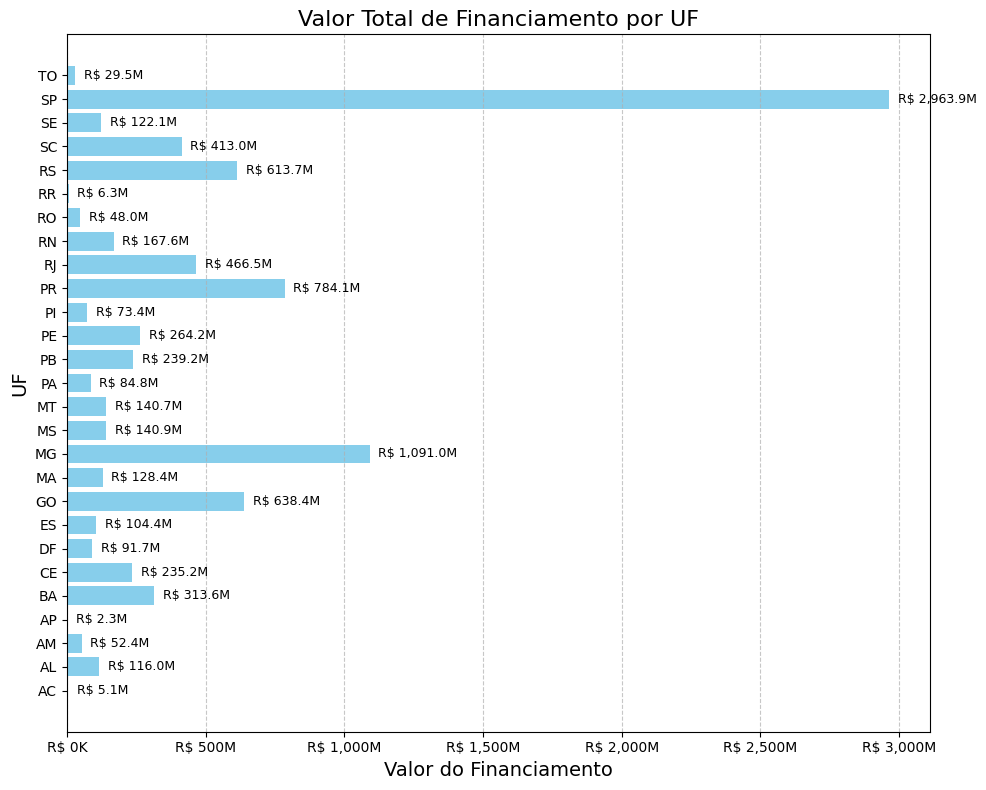

In [26]:
plt.figure(figsize=(10, 8)) # Ajusta o tamanho da figura

bars = plt.barh(
    valores_por_uf_ordenado['mcmv_fgts_txt_uf'], # Eixo Y (Categorias - UFs)
    valores_por_uf_ordenado['vlr_financiamento'], # Eixo X (Valores)
    color='skyblue' # Cor das barras
)

# 3. Adicionar títulos e rótulos
plt.title('Valor Total de Financiamento por UF', fontsize=16)
plt.xlabel('Valor do Financiamento', fontsize=14)
plt.ylabel('UF', fontsize=14)

# 4. Formatar o eixo X para exibir valores monetários de forma mais clara
formatter = mticker.FuncFormatter(lambda x, p: f'R$ {x/1e6:,.0f}M' if x >=1e6 else f'R$ {x/1e3:,.0f}K')
plt.gca().xaxis.set_major_formatter(formatter)

for i, v in enumerate(valores_por_uf_ordenado['vlr_financiamento']):
    uf_label_y_position = i
    valor_formatado = f'R$ {v/1e6:,.1f}M' if v >= 1e6 else f'R$ {v/1e3:,.0f}K'

    plt.text(v + (plt.xlim()[1] * 0.01), # Posição x (valor da barra + pequeno offset)
             uf_label_y_position,        # Posição y (índice da barra)
             valor_formatado,            # Texto a ser exibido
             color='black',
             va='center',                # Alinhamento vertical
             fontsize=9)

plt.grid(axis='x', linestyle='--', alpha=0.7) # Grade apenas no eixo dos valores

plt.tight_layout()

plt.show()

In [27]:
'''
plt.figure(figsize=(8, 6)) # Ajusta o tamanho da figura

plt.boxplot(valores_por_uf_ordenado['vlr_financiamento'], vert=True, patch_artist=True,
            medianprops={'color': 'red', 'linewidth': 2}, # Estiliza a linha da mediana
            boxprops={'facecolor': 'lightblue'}) # Cor da caixa

plt.title('Distribuição dos Valores Totais de Financiamento por UF', fontsize=15)
plt.ylabel('Valor do Financiamento (Agregado por UF)', fontsize=12)
plt.xticks([1], ['Totais de Financiamento por UF']) # Rótulo para o boxplot no eixo x

formatter = mticker.FuncFormatter(lambda x, p: f'R$ {x/1e6:,.0f}M' if x >=1e6 else f'R$ {x/1e3:,.0f}K')
plt.gca().yaxis.set_major_formatter(formatter)

plt.grid(True, linestyle='--', alpha=0.7, axis='y')

plt.tight_layout()

plt.show()
'''

"\nplt.figure(figsize=(8, 6)) # Ajusta o tamanho da figura\n\nplt.boxplot(valores_por_uf_ordenado['vlr_financiamento'], vert=True, patch_artist=True,\n            medianprops={'color': 'red', 'linewidth': 2}, # Estiliza a linha da mediana\n            boxprops={'facecolor': 'lightblue'}) # Cor da caixa\n\nplt.title('Distribuição dos Valores Totais de Financiamento por UF', fontsize=15)\nplt.ylabel('Valor do Financiamento (Agregado por UF)', fontsize=12)\nplt.xticks([1], ['Totais de Financiamento por UF']) # Rótulo para o boxplot no eixo x\n\nformatter = mticker.FuncFormatter(lambda x, p: f'R$ {x/1e6:,.0f}M' if x >=1e6 else f'R$ {x/1e3:,.0f}K')\nplt.gca().yaxis.set_major_formatter(formatter)\n\nplt.grid(True, linestyle='--', alpha=0.7, axis='y')\n\nplt.tight_layout()\n\nplt.show()\n"

Podemos notar que os estados de São Paulo, Minas Gerais e Paraná se apresentam como outliers em uma visualização boxplot do valor financiado agreado por UF. Entretanto, eles não são outliers dado que esses valores são reais e não erros cadastrais.

## 2.3 Analisando dados agrupados por Região

Podemos tentar agrupar por região

In [ ]:
## 1. Definir o mapeamento de UF para Região
mapeamento_uf_regiao = {
    'AC': 'Norte', 'AL': 'Nordeste', 'AP': 'Norte', 'AM': 'Norte',
    'BA': 'Nordeste', 'CE': 'Nordeste', 'DF': 'Centro-Oeste', 'ES': 'Sudeste',
    'GO': 'Centro-Oeste', 'MA': 'Nordeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste',
    'MG': 'Sudeste', 'PA': 'Norte', 'PB': 'Nordeste', 'PR': 'Sul',
    'PE': 'Nordeste', 'PI': 'Nordeste', 'RJ': 'Sudeste', 'RN': 'Nordeste',
    'RS': 'Sul', 'RO': 'Norte', 'RR': 'Norte', 'SC': 'Sul',
    'SP': 'Sudeste', 'SE': 'Nordeste', 'TO': 'Norte'
}

df_com_regiao = valores_por_uf.copy()
df_com_regiao['Regiao'] = df_com_regiao['mcmv_fgts_txt_uf'].map(mapeamento_uf_regiao)

#print("DataFrame com a coluna Regiao:")
#print(df_com_regiao[['mcmv_fgts_txt_uf', 'Regiao', 'vlr_financiamento']].head())

In [ ]:
valores_por_regiao = df_com_regiao.groupby('Regiao')['vlr_financiamento'].sum().reset_index()
#valores_por_regiao.head()

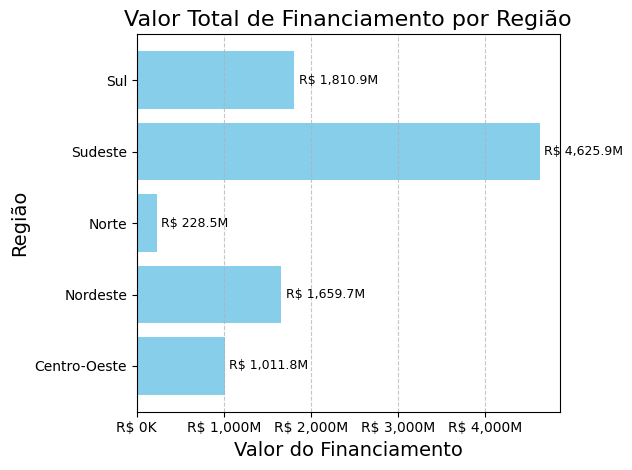

In [30]:
valores_por_regiao_ordenado = valores_por_regiao.sort_values(by='Regiao')

#plt.figure(figsize=(10, 8)) # Ajusta o tamanho da figura

bars = plt.barh(
    valores_por_regiao_ordenado['Regiao'], # Eixo Y (Categorias - UFs)
    valores_por_regiao_ordenado['vlr_financiamento'], # Eixo X (Valores)
    color='skyblue' # Cor das barras
)

# 3. Adicionar títulos e rótulos
plt.title('Valor Total de Financiamento por Região', fontsize=16)
plt.xlabel('Valor do Financiamento', fontsize=14)
plt.ylabel('Região', fontsize=14)

# 4. Formatar o eixo X para exibir valores monetários de forma mais clara
formatter = mticker.FuncFormatter(lambda x, p: f'R$ {x/1e6:,.0f}M' if x >=1e6 else f'R$ {x/1e3:,.0f}K')
plt.gca().xaxis.set_major_formatter(formatter)

for i, v in enumerate(valores_por_regiao_ordenado['vlr_financiamento']):
    uf_label_y_position = i
    valor_formatado = f'R$ {v/1e6:,.1f}M' if v >= 1e6 else f'R$ {v/1e3:,.0f}K'

    plt.text(v + (plt.xlim()[1] * 0.01), # Posição x (valor da barra + pequeno offset)
             uf_label_y_position,        # Posição y (índice da barra)
             valor_formatado,            # Texto a ser exibido
             color='black',
             va='center',                # Alinhamento vertical
             fontsize=9)

plt.grid(axis='x', linestyle='--', alpha=0.7) # Grade apenas no eixo dos valores

plt.tight_layout()

plt.show()

Observação: existe uma indicação que as regiões Sul e sudeste são os maiores beneficiados do programa MCMV em termos absolutos.

## 2.4 Analisando dados por faixa de renda

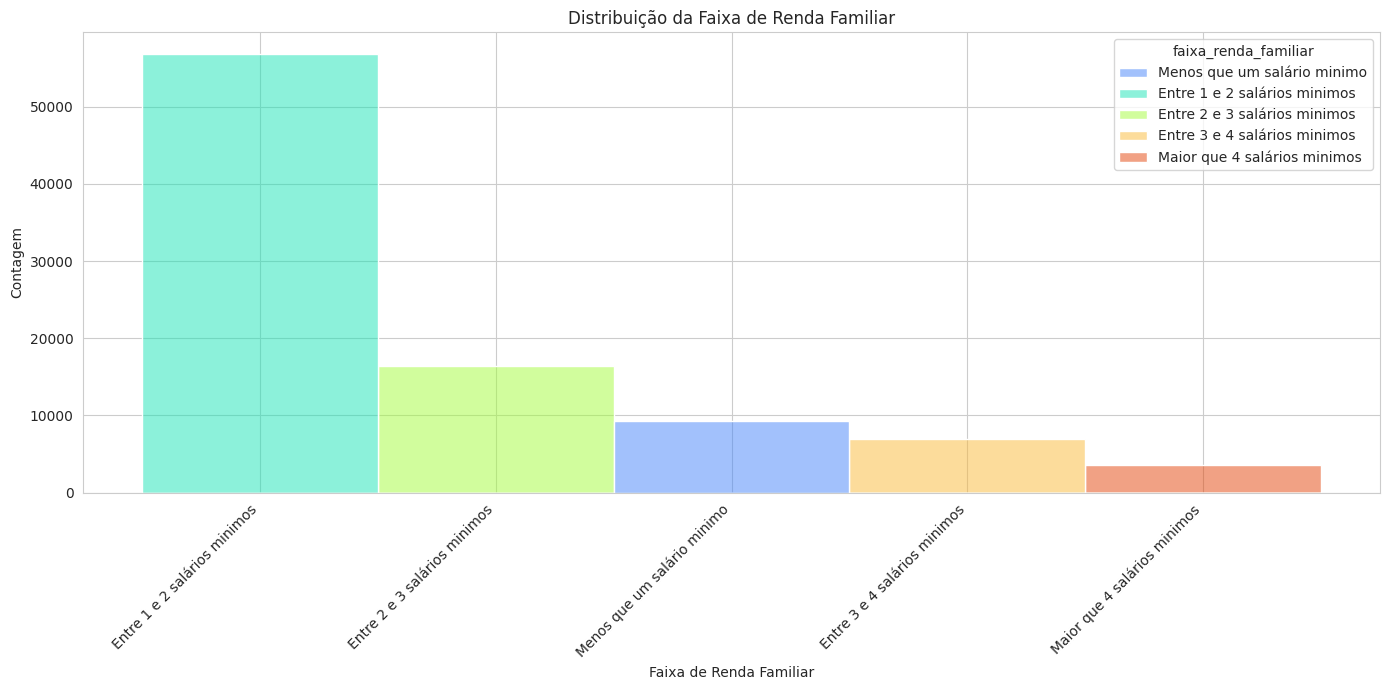

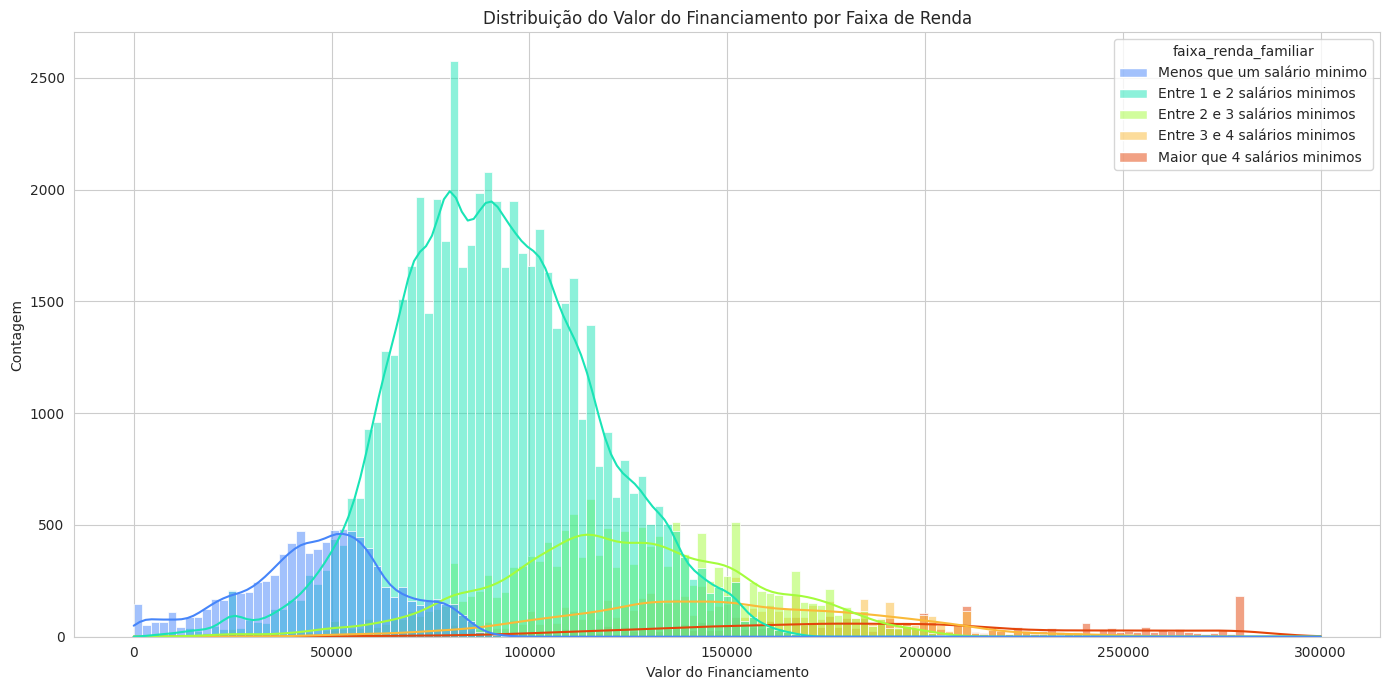

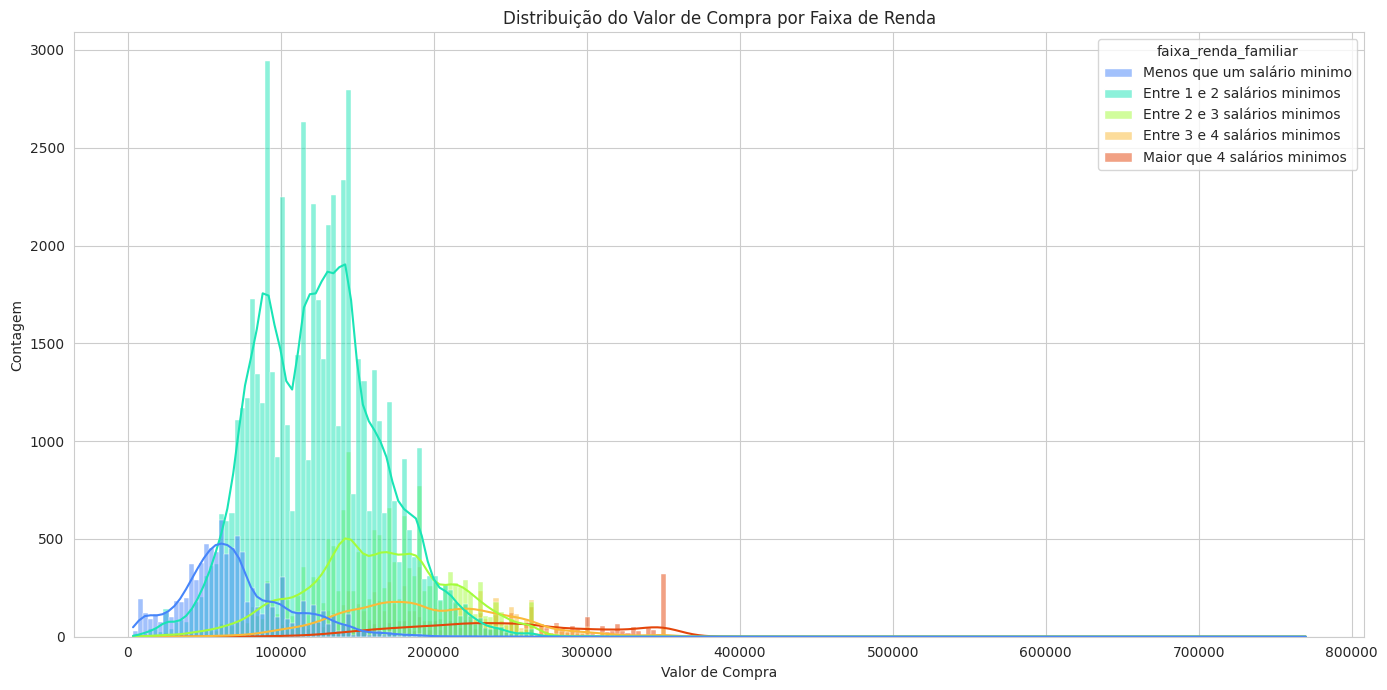

In [43]:
# Histograma de distribuição destacando a faixa de renda da categoria com o valor do financiamento e valor de compra.


# Ordenar as categorias de renda para a legenda
ordem_renda = [
    'Menos que um salário minimo',
    'Entre 1 e 2 salários minimos',
    'Entre 2 e 3 salários minimos',
    'Entre 3 e 4 salários minimos',
    'Maior que 4 salários minimos'
]

# Criar o histograma de distribuição
plt.figure(figsize=(14, 7))
sns.histplot(data=dados_limpos,
             x='faixa_renda_familiar',
             hue='faixa_renda_familiar',
             hue_order=ordem_renda, # Ordena a legenda
             stat='count',
             kde=True,
             palette='turbo')

plt.title('Distribuição da Faixa de Renda Familiar')
plt.xlabel('Faixa de Renda Familiar')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right') # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout() # Ajusta o layout para evitar cortes nos rótulos
plt.show()

# Criar histograma para Vlr Financiamento por Faixa de Renda
plt.figure(figsize=(14, 7))
sns.histplot(data=dados_limpos,
             x='vlr_financiamento',
             hue='faixa_renda_familiar',
             hue_order=ordem_renda, # Ordena a legenda
             kde=True,
             palette='turbo',
             common_norm=False) # Normaliza cada histograma separadamente

plt.title('Distribuição do Valor do Financiamento por Faixa de Renda')
plt.xlabel('Valor do Financiamento')
plt.ylabel('Contagem')
plt.tight_layout()
plt.show()


# Criar histograma para Vlr Compra por Faixa de Renda
plt.figure(figsize=(14, 7))
sns.histplot(data=dados_limpos,
             x='vlr_compra',
             hue='faixa_renda_familiar',
             hue_order=ordem_renda, # Ordena a legenda
             kde=True,
             palette='turbo',
             common_norm=False) # Normaliza cada histograma separadamente

plt.title('Distribuição do Valor de Compra por Faixa de Renda')
plt.xlabel('Valor de Compra')
plt.ylabel('Contagem')
plt.tight_layout()
plt.show()

Observamos que o programa de financimanetos pelo programa Minha Casa Minha Vida está atingindo majoritariamente pessoas com renda familiar de até 3 salários minimos sendo a significativa maioria concentrada em que recebe entre 1 e 2 salários.

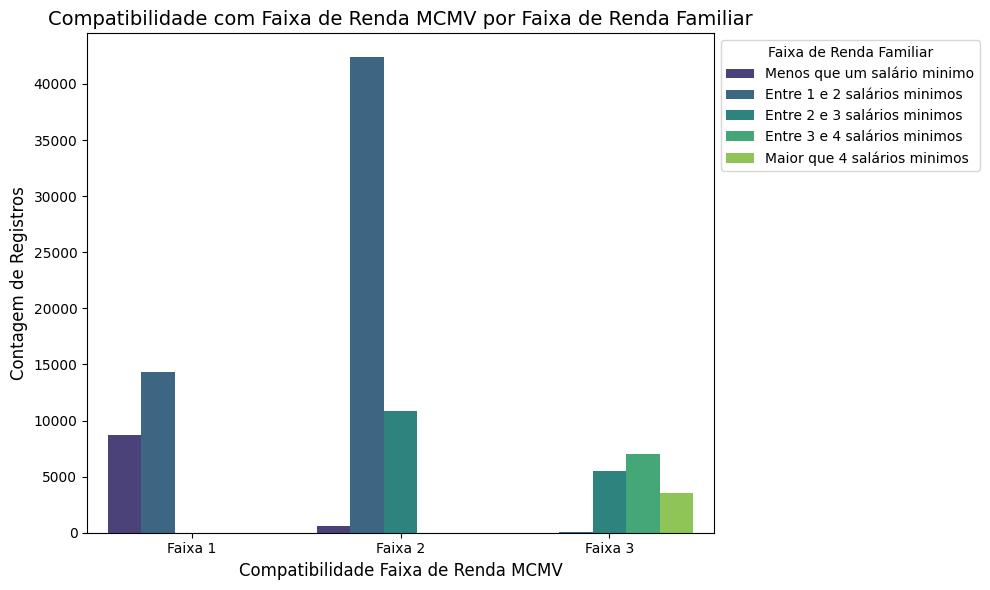

In [32]:
# Histograma comprovando a correlação entre faixa de renda e txt_compatibilidade_faixa_renda

# Define a ordem desejada para as faixas de compatibilidade de renda
ordem_compatibilidade = ['Faixa 1', 'Faixa 2', 'Faixa 3']

# Define a ordem desejada para as faixas de renda familiar para a legenda
ordem_renda = [
    'Menos que um salário minimo',
    'Entre 1 e 2 salários minimos',
    'Entre 2 e 3 salários minimos',
    'Entre 3 e 4 salários minimos',
    'Maior que 4 salários minimos'
]

# Cria o histograma para txt_compatibilidade_faixa_renda por faixa_renda_categoria
plt.figure(figsize=(10, 6)) # Ajusta o tamanho da figura

sns.countplot(
    data=dados_limpos,
    x='txt_compatibilidade_faixa_renda',
    hue='faixa_renda_familiar',
    order=ordem_compatibilidade, # Ordena o eixo x
    hue_order=ordem_renda,       # Ordena a legenda (hue)
    palette='viridis'            # Escolhe uma paleta de cores
)

# Adiciona títulos e labels
plt.title('Compatibilidade com Faixa de Renda MCMV por Faixa de Renda Familiar', fontsize=14)
plt.xlabel('Compatibilidade Faixa de Renda MCMV', fontsize=12)
plt.ylabel('Contagem de Registros', fontsize=12)

# Rotaciona os rótulos do eixo x para melhor visualização, se necessário
plt.xticks(rotation=0)

# Adiciona a legenda fora do gráfico para melhor visualização
plt.legend(title='Faixa de Renda Familiar', loc='upper left', bbox_to_anchor=(1, 1))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Mostra o gráfico
plt.show()

Nosso último gráfico mostra que a maioria dos financiamentos estão na faixa 2 e que a cada nova faixa criada um novo grupo de pessoas é englobado pelo programa. Apesar da faixa 2 ser a mais representativa, as faixas 1 e 3 permitem a cobertura tanto das classes menos favorecidas quanto pessoas da classe média que ainda não possuem seu imovel.

In [33]:
#Calcular valor médio, mediana e desvio padrão do valor financiado

# Calcular média, mediana e desvio padrão do valor financiado
media_financiamento = dados_limpos['vlr_financiamento'].mean()
mediana_financiamento = dados_limpos['vlr_financiamento'].median()
desvio_padrao_financiamento = dados_limpos['vlr_financiamento'].std()

print(f"Média do Valor Financiado: R$ {media_financiamento:.2f}")
print(f"Mediana do Valor Financiado: R$ {mediana_financiamento:.2f}")
print(f"Desvio Padrão do Valor Financiado: R$ {desvio_padrao_financiamento:.2f}")

Média do Valor Financiado: R$ 100450.20
Mediana do Valor Financiado: R$ 96000.00
Desvio Padrão do Valor Financiado: R$ 41040.33


In [34]:
# Calcular quantidade de registros e os valores médio e mediana do valor financiado, valor de renda e do valor de compra para cada faixa de renda arredondando para duas casas decimal quando for necessário ordenando pelas faixas de rendas. Formatar valores em reais

# Agrupar por 'faixa_renda_categoria' e calcular as estatísticas
analise_por_renda = dados_limpos.groupby('faixa_renda_familiar').agg(
    quantidade_registros=('faixa_renda_familiar', 'size'),
    media_vlr_financiamento=('vlr_financiamento', 'mean'),
    mediana_vlr_financiamento=('vlr_financiamento', 'median'),
    media_vlr_renda=('vlr_renda_familiar', 'mean'),
    mediana_vlr_renda=('vlr_renda_familiar', 'median'),
    media_vlr_compra=('vlr_compra', 'mean'),
    mediana_vlr_compra=('vlr_compra', 'median')
)

# Arredondar para duas casas decimais
analise_por_renda = analise_por_renda.round(2)

# Ordenar pelas faixas de renda na ordem desejada
analise_por_renda = analise_por_renda.loc[ordem_renda]

# Formatar os valores monetários em reais
colunas_monetarias = [
    'media_vlr_financiamento', 'mediana_vlr_financiamento',
    'media_vlr_renda', 'mediana_vlr_renda',
    'media_vlr_compra', 'mediana_vlr_compra'
]

for col in colunas_monetarias:
    analise_por_renda[col] = analise_por_renda[col].apply(lambda x: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))

# Imprimir o resultado
#print("\nAnálise por Faixa de Renda Familiar:")
#analise_por_renda

## 2.5 Analisando dados por faixa etaria

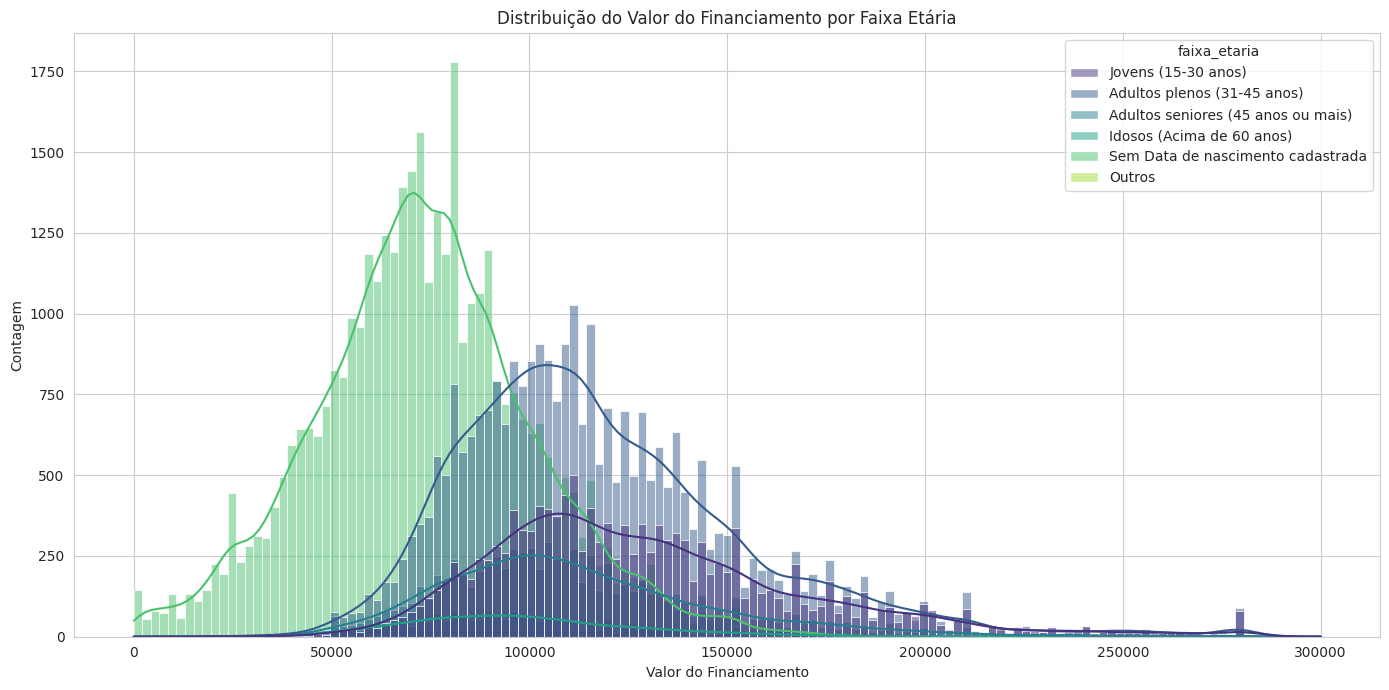

In [44]:
# Histograma dos valores financiados pela faixa etarea
# Ordenar as categorias de idade para a legenda
ordem_idade = [
    'Jovens (15-30 anos)',
    'Adultos plenos (31-45 anos)',
    'Adultos seniores (45 anos ou mais)',
    'Idosos (Acima de 60 anos)',
    'Sem Data de nascimento cadastrada',
    'Outros' # Manter "Outros" por último se houver
]

# Criar histograma para Vlr Financiamento por Faixa Etária
plt.figure(figsize=(14, 7))
sns.histplot(data=dados_limpos,
             x='vlr_financiamento',
             hue='faixa_etaria',
             hue_order=ordem_idade,  # Ordena a legenda
             kde=True,
             palette='viridis',
             common_norm=False) # Normaliza cada histograma separadamente

plt.title('Distribuição do Valor do Financiamento por Faixa Etária')
plt.xlabel('Valor do Financiamento')
plt.ylabel('Contagem')
plt.tight_layout()
plt.show()

# Agrupar por 'faixa_etaria_categoria' e calcular as estatísticas
analise_por_idade = dados_limpos.groupby('faixa_etaria').agg(
    quantidade_registros=('faixa_etaria', 'size'),
    media_vlr_financiamento=('vlr_financiamento', 'mean'),
    mediana_vlr_financiamento=('vlr_financiamento', 'median'),
    media_vlr_renda=('vlr_renda_familiar', 'mean'),
    mediana_vlr_renda=('vlr_renda_familiar', 'median'),
    media_vlr_compra=('vlr_compra', 'mean'),
    mediana_vlr_compra=('vlr_compra', 'median')
)

# Arredondar para duas casas decimais
analise_por_idade = analise_por_idade.round(2)

# Ordenar pelas faixas de idade na ordem desejada
# Certifica-se de que 'Outros' está presente no índice antes de tentar reordenar
# Se 'Outros' não estiver presente nos dados, loc[ordem_idade] pode dar erro.
# Uma forma mais robusta é usar reindex
analise_por_idade = analise_por_idade.reindex(ordem_idade)

# Formatar os valores monetários em reais
colunas_monetarias_idade = [
    'media_vlr_financiamento', 'mediana_vlr_financiamento',
    'media_vlr_renda', 'mediana_vlr_renda',
    'media_vlr_compra', 'mediana_vlr_compra'
]

for col in colunas_monetarias_idade:
    # Verifica se a coluna não é totalmente NaN antes de aplicar a formatação
    if not analise_por_idade[col].isnull().all():
      analise_por_idade[col] = analise_por_idade[col].apply(
          lambda x: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.') if pd.notna(x) else 'N/A'
          )


# Imprimir o resultado
#print("\nAnálise por Faixa Etária:")
#analise_por_idade

Existe um grande volume de financiamento cujo beneficiário não tem data de nascimento cadastrada, possivelmente por falha de cadastro ou pelo beneficiário não saber a informação. Eliminando esses dados percebe-se que a maioria dos financiamentos são realizados na faixa de adultos plenos onde eles já estão estabilizados no mercado de trabalho e ainda novos para cobrir todo o prazo de financiamento. Os adultos seniores e os idosos mostram que o número de contemplações do programa diminui com a idade, talvez tambem devido ao tempo médio de financiamento ser de 30 a 35 anos e a expectativa de vida do brasileiro ser na casa dos 75 anos.


# 3.0 Analisando alguns modelos preditivos

## 3.1 Matriz de correlação

In [36]:
dados_corr =  pd.DataFrame(dados_limpos)

colunas = ["txt_municipio", "mcmv_fgts_txt_uf", "txt_regiao", "txt_tipo_imovel", "txt_sistema_amortizacao", "bln_cotista", "txt_programa_fgts", "txt_compatibilidade_faixa_renda", "faixa_etaria",  "faixa_renda_familiar"]

label_encoder = LabelEncoder()

for coluna in colunas:
    dados_corr[coluna] = label_encoder.fit_transform(dados_corr[coluna])

dados_corr.head(10)

,cod_ibge,txt_municipio,mcmv_fgts_txt_uf,txt_regiao,data_assinatura_financiamento,qtd_uh_financiadas,vlr_financiamento,vlr_subsidio_desconto_fgts,vlr_subsidio_desconto_ogu,vlr_subsidio_equilíbrio_fgts,...,num_taxa_juros,txt_tipo_imovel,bln_cotista,txt_sistema_amortizacao,dte_nascimento,txt_compatibilidade_faixa_renda,txt_nome_empreendimento,idade,faixa_etaria,faixa_renda_familiar
0,312770,1020,10,3,2012-01-18,1,73334.78,7971.975,4006.807,10917.25800,...,5.00,0,0,0,NaT,1,NaN,0,4,0
2,312980,1123,10,3,2018-03-08,1,126400.00,3556.800,395.200,17099.99000,...,5.50,0,1,0,1988-09-06,1,NaN,36,0,0
3,355030,2717,25,3,2019-06-12,1,156951.41,1162.800,129.200,7716.71000,...,6.50,0,1,0,1985-07-26,1,NaN,39,0,1
4,510525,1513,12,0,2015-04-14,1,63567.57,11331.375,2403.625,13199.99175,...,5.00,0,0,0,NaT,0,NaN,0,4,4
5,432300,2964,22,4,2014-02-24,1,88876.36,8049.525,1707.475,13199.99175,...,4.50,0,0,0,NaT,1,NaN,0,4,0
6,261110,2044,15,1,2015-10-30,1,98000.00,1743.225,369.775,13199.99175,...,5.00,0,0,0,NaT,1,NaN,0,4,0
7,520140,119,8,0,2011-03-10,1,80724.00,2232.000,744.000,0.00000,...,4.50,0,0,0,NaT,1,NaN,0,4,0
8,250400,466,14,1,2013-05-17,1,78998.19,0.000,0.000,0.00000,...,6.66,0,0,0,NaT,2,NaN,0,4,2
9,310620,286,10,3,2023-09-28,1,124000.00,20303.000,0.000,22091.96000,...,4.50,1,1,0,1996-03-22,0,NaN,29,3,0
10,355030,2717,25,3,2017-08-02,1,152000.00,0.000,0.000,0.00000,...,7.66,1,1,0,1991-10-01,2,NaN,33,0,2


<Axes: >

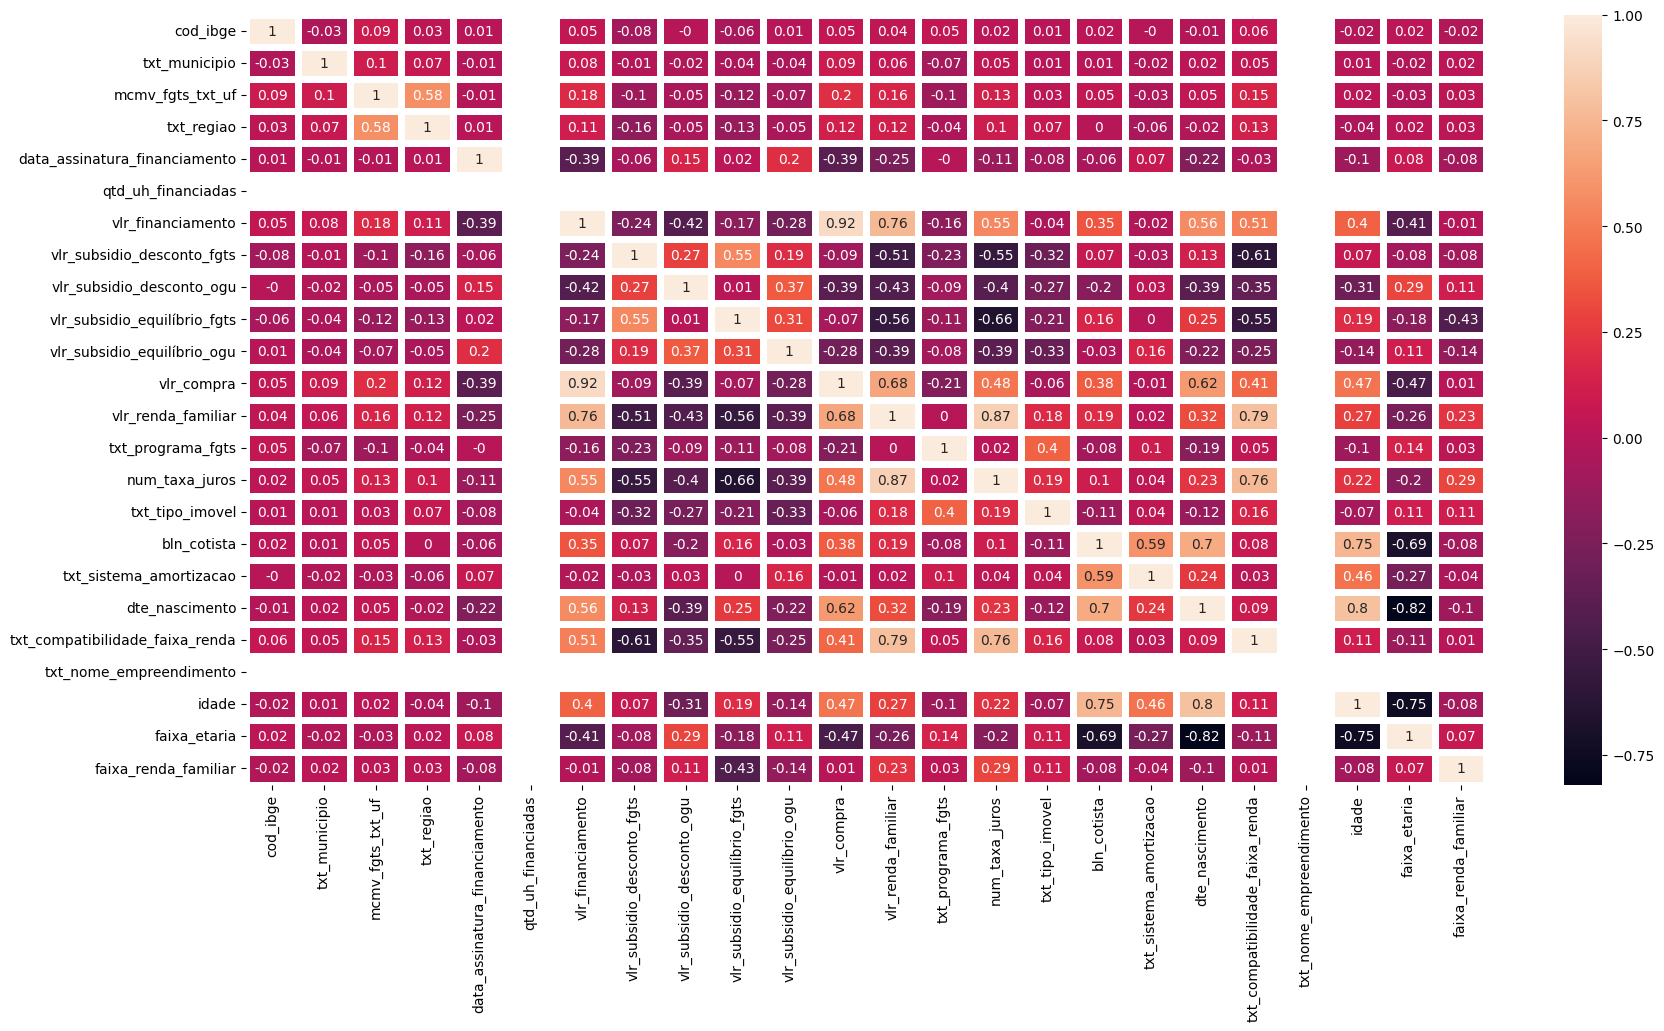

In [37]:
correlation_matrix = dados_corr.corr().round(2)

fig, ax = plt.subplots(figsize=(20,10))

sns.heatmap(data=correlation_matrix, annot=True, linewidths=5, ax=ax)

## 3.2 Primeiro experimento preditivo

In [38]:
# Lista para armazenar os resultados de cada modelo neste experimento
resultados_experimentos = []
# Nome para identificar esta rodada de experimentos/testes
nome_experimento_atual = "Experimento_001"

#Definindo as Variável Alvo (y) e Preditores (X)
X = dados_limpos[['vlr_compra', 'vlr_renda_familiar', 'num_taxa_juros', 'txt_tipo_imovel', 'txt_programa_fgts']]
y = dados_limpos['vlr_financiamento']

#Identificando colunas categóricas e numéricas para pré-processamento
colunas_categoricas = ['txt_tipo_imovel', 'txt_programa_fgts']
colunas_numericas = ['vlr_compra', 'vlr_renda_familiar', 'num_taxa_juros']

#Criando um pipeline de pré-processamento
# OneHotEncoder para variáveis categóricas (handle_unknown='ignore' para lidar com categorias não vistas no teste)
# 'passthrough' para variáveis numéricas (nenhuma transformação aplicada neste exemplo)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), colunas_categoricas)
    ],
    remainder='passthrough' # Deixa as colunas numéricas como estão (ou você pode adicionar um scaler aqui)
)

#Dividindo os dados em conjuntos de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=13)

# 6. Definir os modelos
modelo_lr = LinearRegression()
modelo_dt = DecisionTreeRegressor(max_depth=10)
modelo_rf = RandomForestRegressor(random_state=42, n_estimators=100) # n_estimators é um hiperparâmetro comum
modelo_gb = GradientBoostingRegressor(random_state=42, n_estimators=100) # n_estimators é um hiperparâmetro comum

modelos_testados = {
    "Regressão Linear": modelo_lr,
    "Random Forest Regressor": modelo_rf,
    "Gradient Boosting Regressor": modelo_gb,
    "Decision Tree Regressor": modelo_dt
}

#Treinando e avaliando os modelos
for nome, modelo in modelos_testados.items():
    # Criar o pipeline completo com pré-processador e modelo
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', modelo)])

    print(f"--- Treinando e Avaliando: {nome} ---")

    # Treinar o modelo
    pipeline.fit(X_treino, y_treino)

    # Fazer previsões
    y_pred_treino = pipeline.predict(X_treino)
    y_pred_teste = pipeline.predict(X_teste)

    # Avaliar o modelo
    rmse_treino = np.sqrt(mean_squared_error(y_treino, y_pred_treino))
    r2_treino = r2_score(y_treino, y_pred_treino)

    rmse_teste = np.sqrt(mean_squared_error(y_teste, y_pred_teste))
    r2_teste = r2_score(y_teste, y_pred_teste)

    print(f"Resultados no Treino:")
    print(f"  RMSE: {rmse_treino:.2f}")
    print(f"  R²: {r2_treino:.4f}")

    print(f"Resultados no Teste:")
    print(f"  RMSE: {rmse_teste:.2f}")
    print(f"  R²: {r2_teste:.4f}")
    print("\n")

    resultados_experimentos.append({
      'Experimento': nome_experimento_atual,
      'Modelo': nome,
      'RMSE_Treino': rmse_treino,
      'R2_Treino': r2_treino,
      'RMSE_Teste': rmse_teste,
      'R2_Teste': r2_teste
    })

--- Treinando e Avaliando: Regressão Linear ---
Resultados no Treino:
  RMSE: 14328.25
  R²: 0.8784
Resultados no Teste:
  RMSE: 14392.92
  R²: 0.8758


--- Treinando e Avaliando: Random Forest Regressor ---
Resultados no Treino:
  RMSE: 4735.93
  R²: 0.9867
Resultados no Teste:
  RMSE: 12114.58
  R²: 0.9120


--- Treinando e Avaliando: Gradient Boosting Regressor ---
Resultados no Treino:
  RMSE: 11703.20
  R²: 0.9189
Resultados no Teste:
  RMSE: 11758.39
  R²: 0.9171


--- Treinando e Avaliando: Decision Tree Regressor ---
Resultados no Treino:
  RMSE: 10946.43
  R²: 0.9290
Resultados no Teste:
  RMSE: 12007.70
  R²: 0.9135




## 3.3 Segundo experimento preditivo (hiperparametros)

In [39]:
nome_experimento_atual = "Experimento_002"

#Regressão Linear
print("--- Treinando e Avaliando: Regressão Linear ---")
modelo_lr = LinearRegression()
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', modelo_lr)])
pipeline_lr.fit(X_treino, y_treino)
y_pred_treino_lr = pipeline_lr.predict(X_treino)
y_pred_teste_lr = pipeline_lr.predict(X_teste)

rmse_treino_lr = np.sqrt(mean_squared_error(y_treino, y_pred_treino_lr))
r2_treino_lr = r2_score(y_treino, y_pred_treino_lr)
rmse_teste_lr = np.sqrt(mean_squared_error(y_teste, y_pred_teste_lr))
r2_teste_lr = r2_score(y_teste, y_pred_teste_lr)

print(f"Resultados no Treino:")
print(f"  RMSE: {rmse_treino_lr:.2f}")
print(f"  R²: {r2_treino_lr:.4f}")
print(f"Resultados no Teste:")
print(f"  RMSE: {rmse_teste_lr:.2f}")
print(f"  R²: {r2_teste_lr:.4f}")
print("\n")

resultados_experimentos.append({
  'Experimento': nome_experimento_atual,
  'Modelo': 'Regressão Linear',
  'RMSE_Treino': rmse_treino_lr,
  'R2_Treino': r2_treino_lr,
  'RMSE_Teste': rmse_teste_lr,
  'R2_Teste': r2_teste_lr
})

#Random Forest Regressor com Hiperparâmetros Sugeridos ---
print("--- Treinando e Avaliando: Random Forest Regressor (com hiperparâmetros) ---")
# Sugestões de hiperparâmetros para tentar reduzir overfitting e melhorar
modelo_rf_tuned = RandomForestRegressor(
    n_estimators=150,          # Um pouco mais de árvores
    max_depth=10,              # Limitar a profundidade da árvore
    min_samples_split=10,      # Mínimo de amostras para dividir um nó
    min_samples_leaf=5,        # Mínimo de amostras em um nó folha
    max_features='sqrt',       # Considerar um subconjunto de features para divisão
    random_state=13
)
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', modelo_rf_tuned)])
pipeline_rf.fit(X_treino, y_treino)
y_pred_treino_rf = pipeline_rf.predict(X_treino)
y_pred_teste_rf = pipeline_rf.predict(X_teste)

rmse_treino_rf = np.sqrt(mean_squared_error(y_treino, y_pred_treino_rf))
r2_treino_rf = r2_score(y_treino, y_pred_treino_rf)
rmse_teste_rf = np.sqrt(mean_squared_error(y_teste, y_pred_teste_rf))
r2_teste_rf = r2_score(y_teste, y_pred_teste_rf)

print(f"Resultados no Treino:")
print(f"  RMSE: {rmse_treino_rf:.2f}")
print(f"  R²: {r2_treino_rf:.4f}")
print(f"Resultados no Teste:")
print(f"  RMSE: {rmse_teste_rf:.2f}")
print(f"  R²: {r2_teste_rf:.4f}")
print("\n")

resultados_experimentos.append({
  'Experimento': nome_experimento_atual,
  'Modelo': "Random Forest Regressor",
  'RMSE_Treino': rmse_treino_rf,
  'R2_Treino': r2_treino_rf,
  'RMSE_Teste': rmse_teste_rf,
  'R2_Teste': r2_teste_rf
})

#Gradient Boosting Regressor com Hiperparâmetros Sugeridos ---
print("--- Treinando e Avaliando: Gradient Boosting Regressor (com hiperparâmetros) ---")
# Sugestões de hiperparâmetros para tentar melhorar a robustez e o desempenho
modelo_gb_tuned = GradientBoostingRegressor(
    n_estimators=300,          # Aumentar n_estimators devido à menor learning_rate
    learning_rate=0.03,        # Taxa de aprendizado menor
    max_depth=4,               # Profundidade de árvore ligeiramente aumentada, mas ainda controlada
    subsample=0.8,             # Usar uma fração dos dados para treinar cada árvore
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=13
)
pipeline_gb = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', modelo_gb_tuned)])
pipeline_gb.fit(X_treino, y_treino)
y_pred_treino_gb = pipeline_gb.predict(X_treino)
y_pred_teste_gb = pipeline_gb.predict(X_teste)

rmse_treino_gb = np.sqrt(mean_squared_error(y_treino, y_pred_treino_gb))
r2_treino_gb = r2_score(y_treino, y_pred_treino_gb)
rmse_teste_gb = np.sqrt(mean_squared_error(y_teste, y_pred_teste_gb))
r2_teste_gb = r2_score(y_teste, y_pred_teste_gb)

print(f"Resultados no Treino:")
print(f"  RMSE: {rmse_treino_gb:.2f}")
print(f"  R²: {r2_treino_gb:.4f}")
print(f"Resultados no Teste:")
print(f"  RMSE: {rmse_teste_gb:.2f}")
print(f"  R²: {r2_teste_gb:.4f}")
print("\n")

resultados_experimentos.append({
  'Experimento': nome_experimento_atual,
  'Modelo': "Gradient Boosting Regressor",
  'RMSE_Treino': rmse_treino_gb,
  'R2_Treino': r2_treino_gb,
  'RMSE_Teste': rmse_teste_gb,
  'R2_Teste': r2_teste_gb
})

#Decision Tree Regressor com Hiperparâmetros Sugeridos ---
print("--- Treinando e Avaliando: Decision Tree Regressor (com hiperparâmetros) ---")

# Definimos max_depth e max_leaf_nodes ANTES de treinar
max_profundidade_desejada = 4
max_folhas_desejadas = 8

# Instanciamos o classificador com os hiperparâmetros desejados
modelo_dt_tuned = DecisionTreeRegressor(
    max_depth=max_profundidade_desejada,
    max_leaf_nodes=max_folhas_desejadas,
    random_state=42
)

pipeline_dt = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', modelo_dt_tuned)])
pipeline_dt.fit(X_treino, y_treino)
y_pred_treino_dt = pipeline_dt.predict(X_treino)
y_pred_teste_dt = pipeline_dt.predict(X_teste)

rmse_treino_dt = np.sqrt(mean_squared_error(y_treino, y_pred_treino_dt))
r2_treino_dt = r2_score(y_treino, y_pred_treino_dt)
rmse_teste_dt = np.sqrt(mean_squared_error(y_teste, y_pred_teste_dt))
r2_teste_dt = r2_score(y_teste, y_pred_teste_dt)

print(f"Resultados no Treino:")
print(f"  RMSE: {rmse_treino_dt:.2f}")
print(f"  R²: {r2_treino_dt:.4f}")
print(f"Resultados no Teste:")
print(f"  RMSE: {rmse_teste_dt:.2f}")
print(f"  R²: {r2_teste_dt:.4f}")
print("\n")

resultados_experimentos.append({
  'Experimento': nome_experimento_atual,
  'Modelo': "Decision Tree Regressor",
  'RMSE_Treino': rmse_treino_dt,
  'R2_Treino': r2_treino_dt,
  'RMSE_Teste': rmse_teste_dt,
  'R2_Teste': r2_teste_dt
})

--- Treinando e Avaliando: Regressão Linear ---
Resultados no Treino:
  RMSE: 14328.25
  R²: 0.8784
Resultados no Teste:
  RMSE: 14392.92
  R²: 0.8758


--- Treinando e Avaliando: Random Forest Regressor (com hiperparâmetros) ---
Resultados no Treino:
  RMSE: 11377.00
  R²: 0.9233
Resultados no Teste:
  RMSE: 11711.00
  R²: 0.9178


--- Treinando e Avaliando: Gradient Boosting Regressor (com hiperparâmetros) ---
Resultados no Treino:
  RMSE: 11301.11
  R²: 0.9244
Resultados no Teste:
  RMSE: 11450.15
  R²: 0.9214


--- Treinando e Avaliando: Decision Tree Regressor (com hiperparâmetros) ---
Resultados no Treino:
  RMSE: 17258.78
  R²: 0.8236
Resultados no Teste:
  RMSE: 17018.73
  R²: 0.8263




# 4.0 Analisando o resultado dos modelos

In [40]:
#Exibindo a tabela de resultados dos experimentos ---
df_resultados_experimentos = pd.DataFrame(resultados_experimentos)

df_resultados_experimentos.head(10)

,Experimento,Modelo,RMSE_Treino,R2_Treino,RMSE_Teste,R2_Teste
0,Experimento_001,Regressão Linear,14328.253393,0.878399,14392.920123,0.875793
1,Experimento_001,Random Forest Regressor,4735.927183,0.986715,12114.582515,0.912004
2,Experimento_001,Gradient Boosting Regressor,11703.202002,0.918874,11758.390608,0.917102
3,Experimento_001,Decision Tree Regressor,10946.430988,0.929027,12007.695647,0.913549
4,Experimento_002,Regressão Linear,14328.253393,0.878399,14392.920123,0.875793
5,Experimento_002,Random Forest Regressor,11376.997032,0.923333,11710.996019,0.917769
6,Experimento_002,Gradient Boosting Regressor,11301.105738,0.924353,11450.150705,0.921391
7,Experimento_002,Decision Tree Regressor,17258.780210,0.823571,17018.734488,0.826339


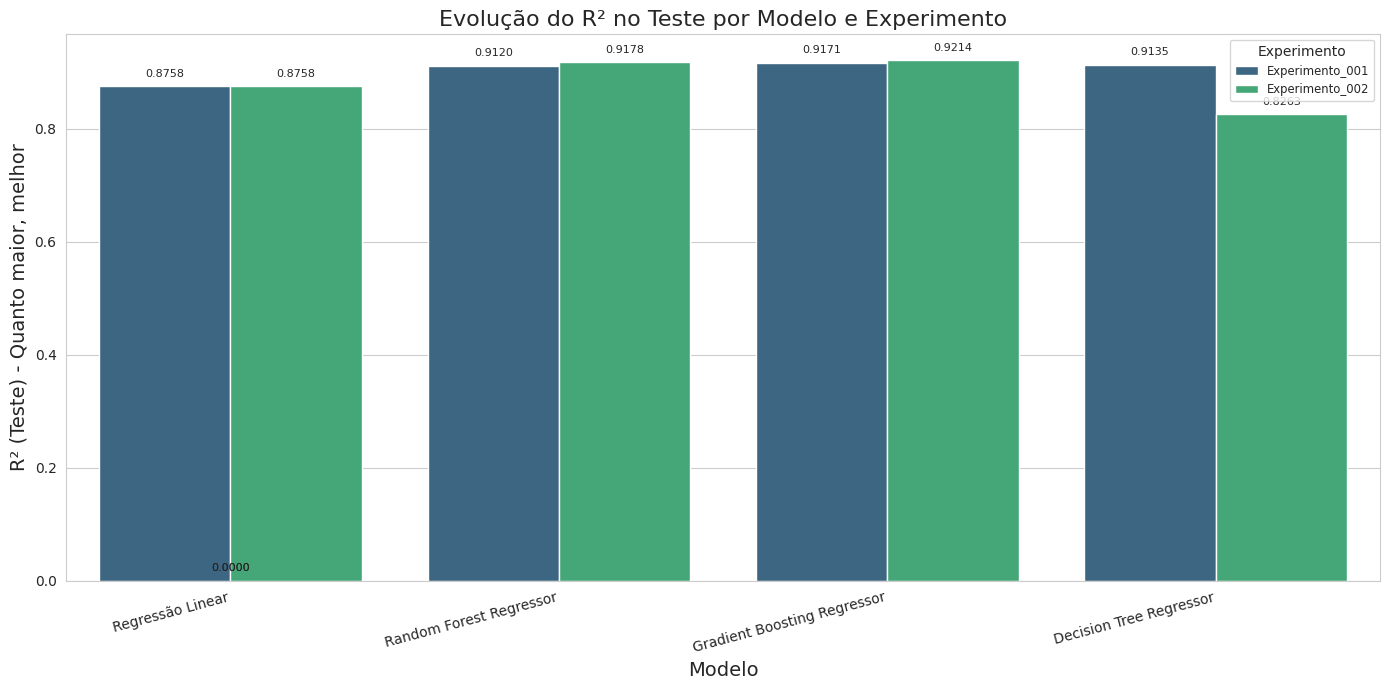

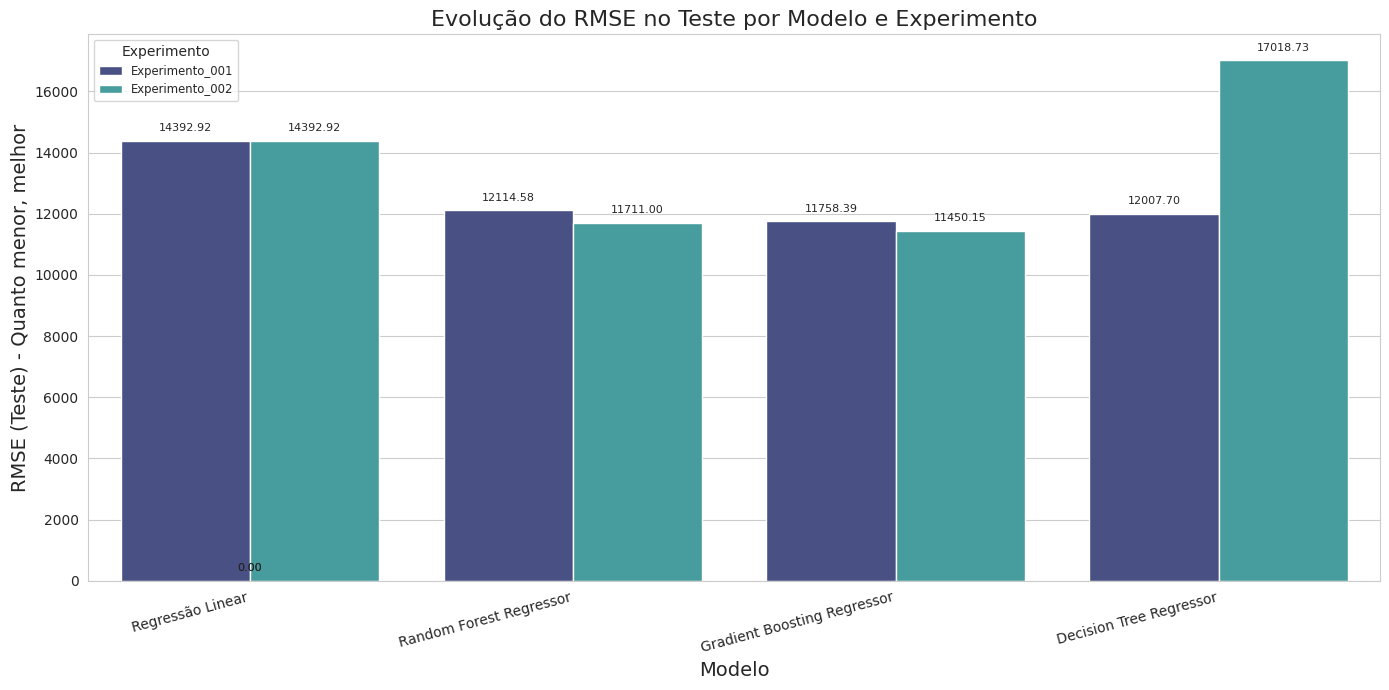

In [41]:
#Configurações de Plotagem
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 7) # Tamanho das figuras

# --- 1. Gráfico Comparativo para R2_Teste ---
plt.figure() # Cria uma nova figura
ax1 = sns.barplot(x='Modelo', y='R2_Teste', hue='Experimento', data=df_resultados_experimentos, palette='viridis')
plt.title('Evolução do R² no Teste por Modelo e Experimento', fontsize=16)
plt.xlabel('Modelo', fontsize=14)
plt.ylabel('R² (Teste) - Quanto maior, melhor', fontsize=14)
plt.xticks(rotation=15, ha='right', fontsize=10) # Rotaciona os nomes dos modelos para melhor leitura
plt.yticks(fontsize=10)
ax1.legend(title='Experimento', fontsize='small', title_fontsize='medium')

# Adicionar os valores nas barras (opcional, pode poluir se tiver muitas barras)
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.4f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points',
                   fontsize=8)
plt.tight_layout() # Ajusta o plot para caber tudo
plt.show()


# --- 2. Gráfico Comparativo para RMSE_Teste ---
plt.figure() # Cria uma nova figura
ax2 = sns.barplot(x='Modelo', y='RMSE_Teste', hue='Experimento', data=df_resultados_experimentos, palette='mako')
plt.title('Evolução do RMSE no Teste por Modelo e Experimento', fontsize=16)
plt.xlabel('Modelo', fontsize=14)
plt.ylabel('RMSE (Teste) - Quanto menor, melhor', fontsize=14)
plt.xticks(rotation=15, ha='right', fontsize=10)
plt.yticks(fontsize=10)
ax2.legend(title='Experimento', fontsize='small', title_fontsize='medium')

# Adicionar os valores nas barras (opcional)
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points',
                   fontsize=8)
plt.tight_layout()
plt.show()


Pelos gráficos, constatamos que a configuração dos hiperparametros melhorou o resultado obtido pelo Gradient Boosting Regressor.